# Part II - (Visualizing FordGoBike Data)
## by David Onwachukwu

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from jupyterthemes import jtplot
jtplot.style(theme = 'solarizedl')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
gobike_clean = pd.read_csv('fordgobike_master_clean.csv')
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696859 entries, 0 to 1696858
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        int64  
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
 16  duration_minute          int64  
 17  start_time_month         object 
 18  start_time_weekday       object 
 19  start_time_hour          int64  
 20  end_time_hour            int64  
 21  member_a

## Bike usage by Type of User

> This pie chart shows the user types of all users of the bike system, users are either Subscribers(paying customers) and Customers(casual users). The chart shows us that majority of the users are Subscribers.


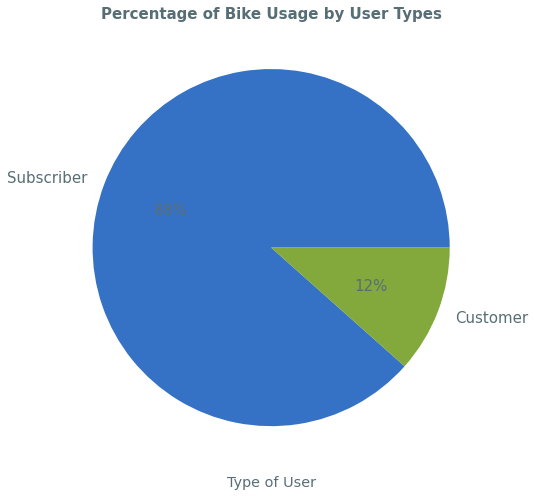

In [4]:
gobike_clean.user_type.value_counts().plot(kind='pie',figsize=(8,10),fontsize =15, autopct='%1.0f%%')

ax = plt.gca()
ax.set_ylabel('')
ax.set_xlabel('Type of User')
ax.set_title("Percentage of Bike Usage by User Types", fontsize=15, fontweight='bold');

## (Monthly Usage of the Bike System)

> The chart shows us that the bikes are in demand the most in summer and demand drops in the winter months which is not too surprising. It peaks in October and is least used in January.

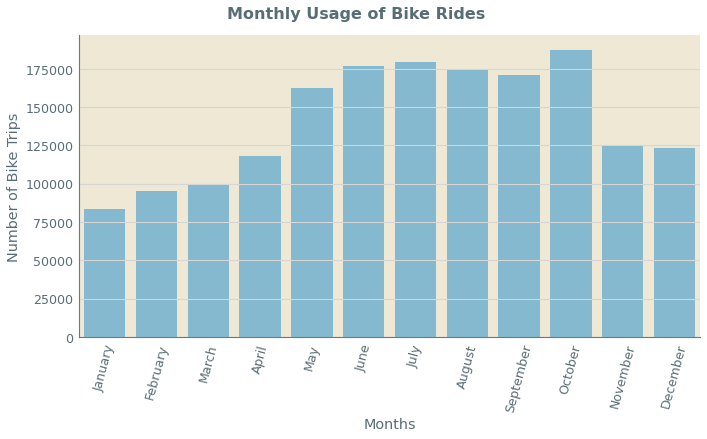

In [6]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
base_color = sb.color_palette()[5]
mu = sb.catplot(data=gobike_clean, x='start_time_month', kind='count', color = base_color,order=months,  aspect =2.0)

mu.set_axis_labels('Months', 'Number of Bike Trips')

mu.fig.suptitle('Monthly Usage of Bike Rides', y=1.05, fontsize=16, fontweight='bold');

mu.set_xticklabels(rotation=75);

## Weekly Bike Usage by User Type

The plot shows that customers use the bike service mainly on weekends and subscribers use the service mainly on weekdays, we can assume that subscribers are either students or of the working class and that a lot of customers could be tourists checking out the bay area



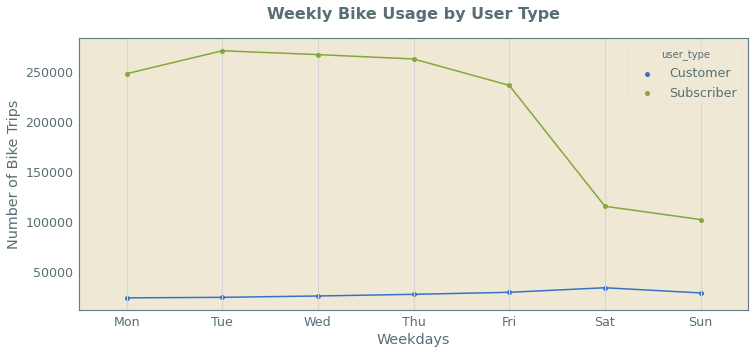

In [7]:
plt.figure(figsize=(12, 5))

gobike_clean_user_week = gobike_clean.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=gobike_clean_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Weekly Bike Usage by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

## Bike Usage by age group among the genders

The age range of majority of the users falls under 21-40, we can also tell that majority of the users are male. Over 40,000 men in the 21-30 age group use the bikes and 48,000 for the 31-40 range compared to the 16,000 and 17,000 respectively for women.

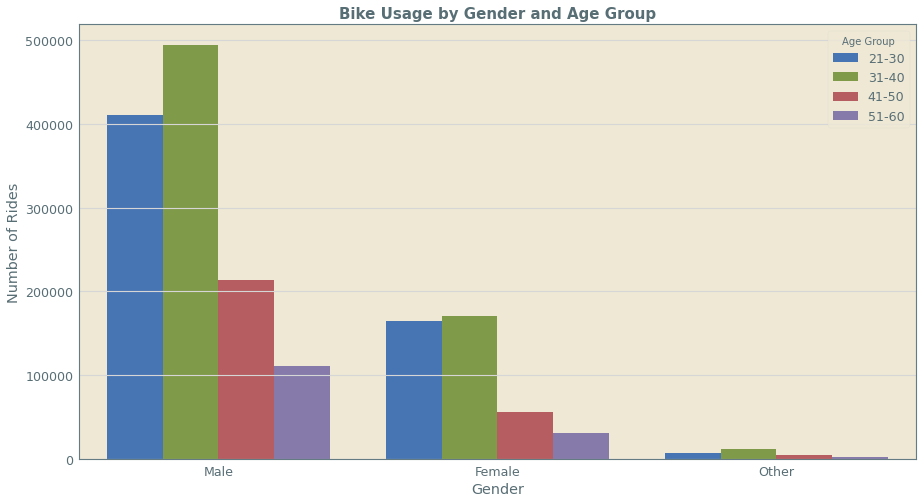

In [8]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
age_order =['21-30', '31-40', '41-50', '51-60']
ax = sb.countplot(x='member_gender', hue='age_category', hue_order=age_order,data=gobike_clean[gobike_clean['age_category'].isin(['21-30', '31-40', '41-50', '51-60'])])

ax.legend().set_title('Age Group')
ax.set_ylabel('Number of Rides')
ax.set_xlabel('Gender')
ax.set_title("Bike Usage by Gender and Age Group",fontweight='bold' ,fontsize=15);

## Weekly bike trips based on Customer and Subscribers' Age groups
Subscribers are mostly active on weekdays, the age groups which are most active range from 21-40, which consists mainly of students and the working class population.
Customers are mainly active on weekends and the same age groups as in subscribers are the most active.

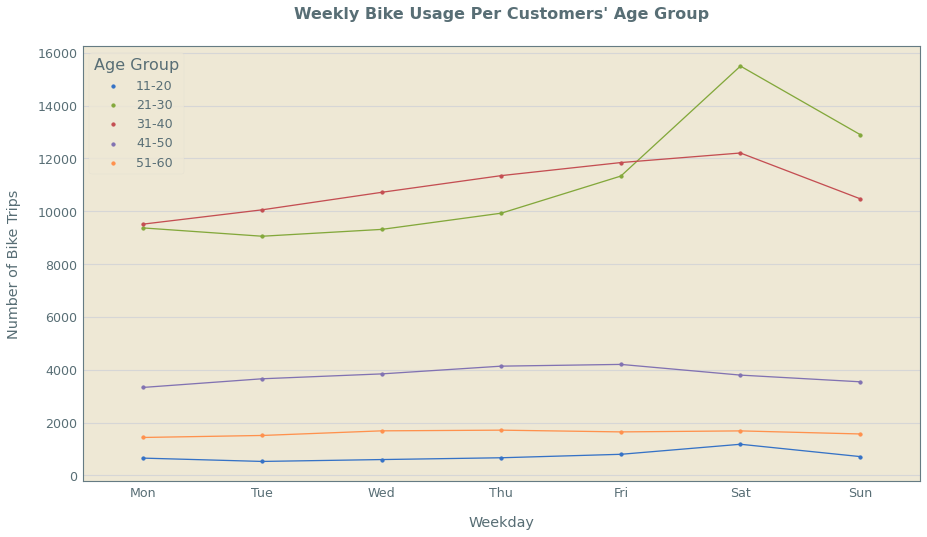

In [9]:
# create a dataframe for customer_age and group by weekday
customer_age = gobike_clean[gobike_clean['user_type']== 'Customer'].groupby(['start_time_weekday', 'age_category']).agg({'bike_id':'count'}).reset_index()
ax = sb.pointplot(data = customer_age, x='start_time_weekday', y='bike_id', hue='age_category', scale=.6, order = weekday, height=5, aspect=2);

plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Weekly Bike Usage Per Customers' Age Group", y = 1.05, fontsize = 16, fontweight = 'bold');


leg = ax.legend()
leg.set_title('Age Group', prop={'size': 16})

plt.show()

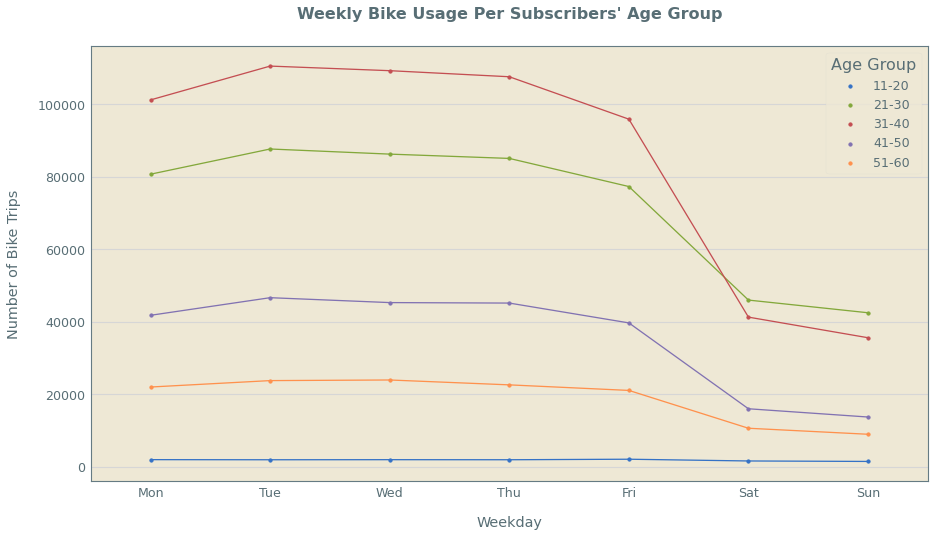

In [10]:
# create a dataframe for subscribers_age and group by
subscriber_age = gobike_clean[gobike_clean['user_type'] == 'Subscriber'].groupby(['start_time_weekday', 'age_category']).agg({'bike_id':'count'}).reset_index()

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data = subscriber_age, x='start_time_weekday', y='bike_id', hue='age_category', scale=.6, order = weekday, height=5, aspect=2);

plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Weekly Bike Usage Per Subscribers' Age Group", y = 1.05, fontsize = 16, fontweight = 'bold');


leg = ax.legend()
leg.set_title('Age Group', prop={'size': 16})

plt.show()

## Summary
There was a lot more subscribers using the bike sharing system than casual customers overall, both of which ride the most during the summer season and the least during the winter months. Obviously different usage patterns and riding habits are observed between the two types of users. Subscribers used the system heavily on work days concentrated around 8-9am and 5-6pm for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes. Subscribers tend to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient. Age is also a factor within user type, subscribers who fall in the age group of 21-40 years old are the most common age group to use the bike sharing system. The 21-40 year olds also led the spike which occured across all age groups in October.


In [4]:
# Use this command if you are running this file in local
!jupyter nbconvert Slides.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Slides.ipynb to slides
[NbConvertApp] Writing 824531 bytes to Slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/home/linuxdavid/anaconda3/envs/datasci-env/bin/jupyter-nbconvert", line 10, in <module>
    sys.exit(main())
  File "/home/linuxdavid/anaconda3/envs/datasci-env/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/home/linuxdavid/anaconda3/envs/datasci-env/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/home/linuxdavid/anaconda3/envs/datasci-env/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 414, in start
    self.convert_notebooks()
  File "/home/linuxdavid/anaconda3/envs/datasci-env/lib/python3.9/site-packages/nbconvert/nbconvertapp